In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas
%matplotlib inline
import seaborn as sns
import numpy as np


In [26]:
ds=pd.read_csv('mushrooms.csv')
ds.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df=ds.apply(le.fit_transform)
df['class'].value_counts() / df.shape[0]

0    0.517971
1    0.482029
Name: class, dtype: float64

In [28]:
header=list(ds.columns.values)

print (header)

['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


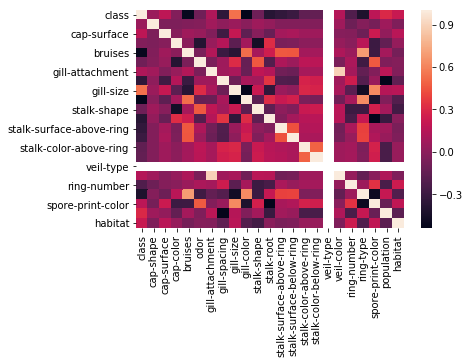

In [29]:
sns.heatmap(df.corr())

In [30]:
le1=LabelEncoder()
ds.head()
ds.iloc[:,1]=le1.fit_transform(ds.iloc[:,1])
ds.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,5,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,5,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,0,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,5,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,5,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [41]:
arr=np.array([1,2,3,4])
y=np.array([23,4,56,54])
arr=np.vstack((arr,y))
q=le1.fit_transform(ds.iloc[:,2])
w=le1.fit_transform(ds.iloc[:,3])
np.vstack((q,w))


array([[2, 2, 2, ..., 2, 3, 2],
       [4, 9, 8, ..., 4, 4, 4]])

In [45]:
df1=ds.apply(le1.fit_transform)
df1.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [218]:
from sklearn.cross_validation import train_test_split
X=df.iloc[:,1:].values
y=df.iloc[:,0].values
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=0)


In [219]:
#DECISION TREE IMPLEMENTATION

In [220]:
import datetime
from sklearn.tree import DecisionTreeClassifier as DTC
dt=DTC()
acc=[]
ans=[]
for ix in range (5):
    start =datetime.datetime.now()
    dt.fit(X_train,y_train)
    end =datetime.datetime.now()
    score=dt.score(X_test,y_test)
    print(score)
    acc.append(score*100)
    features=dt.feature_importances_
    ans.append(features)
    

1.0
1.0
1.0
1.0
1.0


feature most expressive in telling if the mushroom is poisonous or not %s gill-color


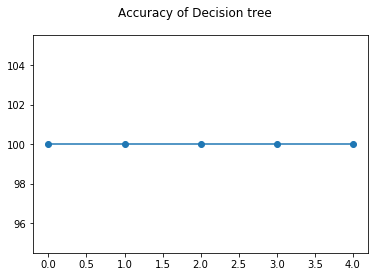

In [221]:
temp=[]

for ix in range(len(ans)):
    temp.append(np.argmax(ans[ix]))
model=max(set(temp),key=temp.count)
print("feature most expressive in telling if the mushroom is poisonous or not %s",header[model+1])
plt.figure(0)
plt.suptitle("Accuracy of Decision tree",fontsize=12)
plt.plot(acc,'-o')
plt.show()

In [222]:
# just experimenting
d=[]
a=np.array([900,3,40000,12,5,23,28,4,1,3,2,2,2])
b=np.array([2,4,99995,690,7,2235])
c=np.array([23,2,3,3,4,466])
d.append(a)
d.append(b)
d.append(c)
print(d)
d[1][3]
print(len(d))
j=[]
for i in range(len(d)):
    j.append(np.argmax(d[i]))
print(set(j))
print(j.count)
model=max(set(j),key=j.count)
print( model)


[array([  900,     3, 40000,    12,     5,    23,    28,     4,     1,
           3,     2,     2,     2]), array([    2,     4, 99995,   690,     7,  2235]), array([ 23,   2,   3,   3,   4, 466])]
3
{2, 5}
<built-in method count of list object at 0x7f11d9580f48>
2


# Random Forest

In [223]:
qqq=[]
acc2=[]
ans2=[]
from sklearn.ensemble import RandomForestClassifier as RF
for x in range(2,200,15):
    qqq.append(x)
for xx in range(len(qqq)):
    rt=RF(n_estimators=qqq[xx],n_jobs=2)
    rt.fit(X_train,y_train)
    score2=rt.score(X_test,y_test)
    acc2.append(score2*100)
    features2=rt.feature_importances_
    ans.append(features2)

the most descriptive feature in predicting the outcome acc to random forest is %s odor


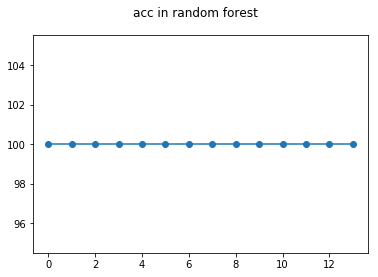

In [224]:
temp2=[]
for xx2 in range(len(ans)):
    temp2.append(np.argmax(ans[xx2]))
model=max(set(temp2),key=temp2.count)
print("the most descriptive feature in predicting the outcome acc to random forest is %s",header[model+1])
plt.figure(2)
plt.suptitle("acc in random forest",fontsize=12)
plt.plot(acc2,'-o')

# KNN IMPLEMENTATION

In [225]:
from sklearn.neighbors import KNeighborsClassifier as KNN



acc = []
ans = []
neighbours = []
for ix in range(3, 200, 20):
    neighbours.append(ix)

for ix in range(len(neighbours)):
    knn = KNN(n_neighbors=neighbours[ix], n_jobs=-1)
    
    knn.fit(X_train, y_train)
   
    score = knn.score(X_test, y_test)

    acc.append(score*100)
    temp = dt.feature_importances_
    ans.append(temp)
    #print "\n"

Features most indicative of a poisonous mushroom wrt kNN :%s  gill-color


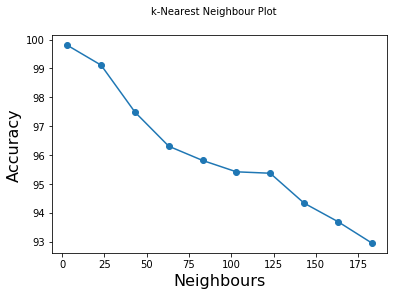

In [226]:


temp = []

for ix in range(0, len(ans)):
    temp.append(np.argmax(ans[ix]))

mode = max(set(temp), key=temp.count) #find mode for features importance in variable estimators
print ("Features most indicative of a poisonous mushroom wrt kNN :%s ", header[mode+1])

plt.figure(2)
plt.suptitle('k-Nearest Neighbour Plot', fontsize=10)
plt.plot(neighbours, acc, '-o')
plt.xlabel('Neighbours', fontsize=16)
plt.ylabel('Accuracy', fontsize=16)
plt.show()



# Logistic Regression 

In [231]:
from sklearn.linear_model import LogisticRegression as Lr
lr=Lr(n_jobs=1)
lr.fit(X_train,y_train)
score=lr.score(X_test,y_test)
print ("accuracy: ",score*100)
features = lr.feature_importances_


accuracy  94.7316592811


In [234]:
temp = np.argmax(features)

print ("Features most indicative of a poisonous mushroom wrt Logistic Regression Model : ", header[temp+1])

Features most indicative of a poisonous mushroom wrt Logistic Regression Model :  gill-color
